# Task 2

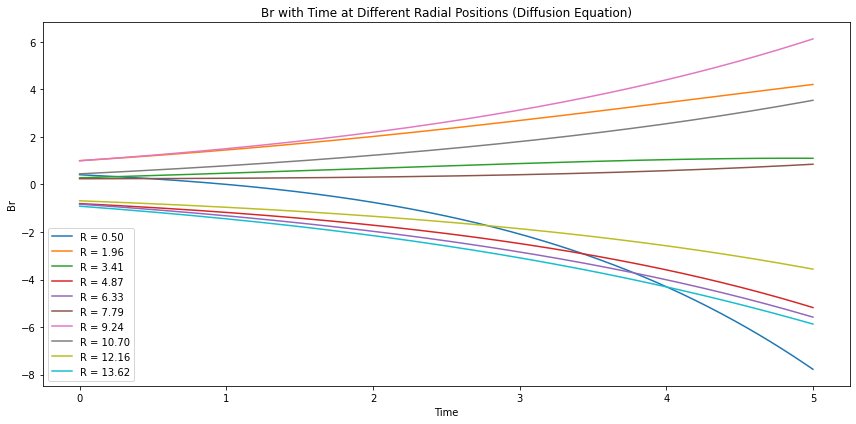

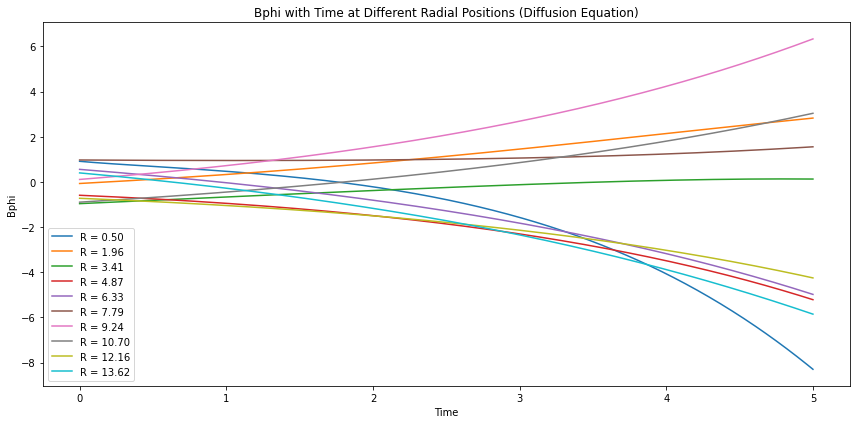

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
eta_t = 0.25 # Increased turbulent magnetic diffusivity
np.random.seed(42)
# Radial grid
R_max = 15 # Maximum radial distance(in kpc)
Nr = 200  # Increased number of grid points in radial direction
dr = R_max / Nr

# Time parameters
T = 5 # Increased total time
Nt = 500 # Increased number of time steps
dt = T / Nt
h=1
# Initialize magnetic field B (considering only the radial component) with a larger seed field
R = np.linspace(0.5, R_max, Nr)
Br = np.sin((4 * np.pi * R)/R_max)
Bphi = np.cos(4 * np.pi * R / R_max)
#Br = np.exp(-R/R_max)
#Br = np.random.rand(Nr)
# Function to compute the radial Laplacian of B
def compute_laplacian_Br(R,Br,Bphi):
    alpha = 0.2
    return eta_t*(np.gradient((1/R)*np.gradient(R*Br, dr), dr) + ((np.pi)**2)*Br/(4*h**2)) -(2*alpha*Bphi/np.pi)

def compute_laplacian_Bphi(R,Br,Bphi):
    omega0 = 0.6
    r_omega = 1
    omega = omega0/(1+(R/r_omega)**2)**0.5
    q = ((R/r_omega)**2) * (1+(R/r_omega)**2)**(-1)
    return eta_t*(np.gradient((1/R)*np.gradient(R*Bphi, dr), dr) + ((np.pi)**2)*Br/(4*h**2)) - (q*omega*Br)

# Runge-Kutta method for solving the diffusion equation
def runge_kutta_step(R,Br,Bphi, dt):
    k1_Br = dt * compute_laplacian_Br(R,Br,Bphi)
    k1_Bphi = dt * compute_laplacian_Bphi(R,Br,Bphi)

    k2_Br = dt * compute_laplacian_Br(R + 0.5*k1_Br,Br + 0.5 * k1_Br, Bphi + 0.5*k1_Br)
    k2_Bphi = dt * compute_laplacian_Bphi(R + 0.5*k1_Bphi,Br + 0.5 * k1_Bphi, Bphi + 0.5*k1_Bphi)

    k3_Br = dt * compute_laplacian_Br(R + 0.5*k2_Br,Br + 0.5 * k2_Br, Bphi + 0.5*k2_Br)
    k3_Bphi = dt * compute_laplacian_Bphi(R + 0.5*k2_Bphi,Br + 0.5 * k2_Bphi, Bphi + 0.5*k2_Bphi)

    k4_Br = dt * compute_laplacian_Br(R + k3_Br,Br + k3_Br, Bphi + k3_Br)
    k4_Bphi = dt * compute_laplacian_Bphi(R + k3_Bphi,Br + k3_Bphi, Bphi + k3_Bphi)

    new_Br = Br + (k1_Br + 2 * k2_Br + 2 * k3_Br + k4_Br) / 6
    new_Bphi = Bphi + (k1_Bphi + 2 * k2_Bphi + 2 * k3_Bphi + k4_Bphi) / 6

    return new_Br, new_Bphi

# Store the evolution of magnetic field at different radial positions
evolution_Br = np.zeros((Nt + 1, Nr))
evolution_Bphi = np.zeros((Nt + 1, Nr))

# Time-stepping scheme using Runge-Kutta
for t in range(Nt + 1):
    evolution_Br[t, :] = np.copy(Br)
    evolution_Bphi[t, :] = np.copy(Bphi)
    Br, Bphi = runge_kutta_step(R,Br, Bphi, dt)

# Plot the magnetic field components Br and Bphi with time at different radial positions
plt.figure(figsize=(12, 6))
for i in range(0, Nr, Nr // 10):  # Plot every 10th radial position
    plt.plot(np.linspace(0, T, Nt + 1), evolution_Br[:, i], label=f'R = {R[i]:.2f}')
plt.xlabel('Time')
plt.ylabel('Br')
plt.title('Br with Time at Different Radial Positions (Diffusion Equation)')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for i in range(0, Nr, Nr // 10):  # Plot every 10th radial position
    plt.plot(np.linspace(0, T, Nt + 1), evolution_Bphi[:, i], label=f'R = {R[i]:.2f}')
plt.xlabel('Time')
plt.ylabel('Bphi')
plt.title('Bphi with Time at Different Radial Positions (Diffusion Equation)')
plt.legend()
plt.tight_layout()
plt.show()


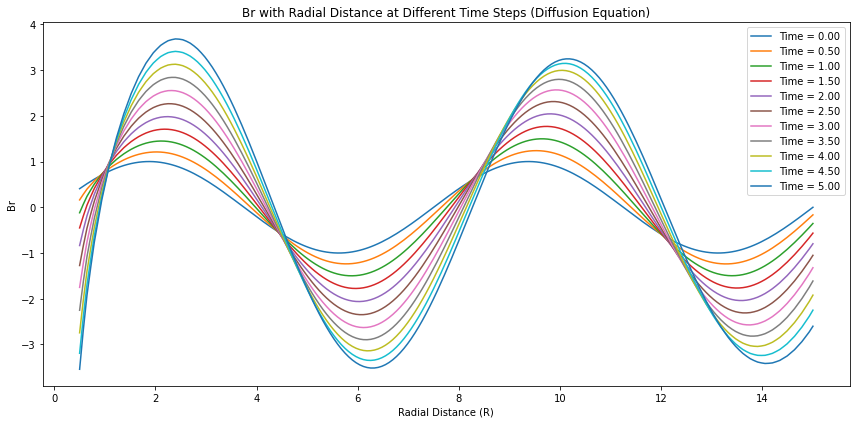

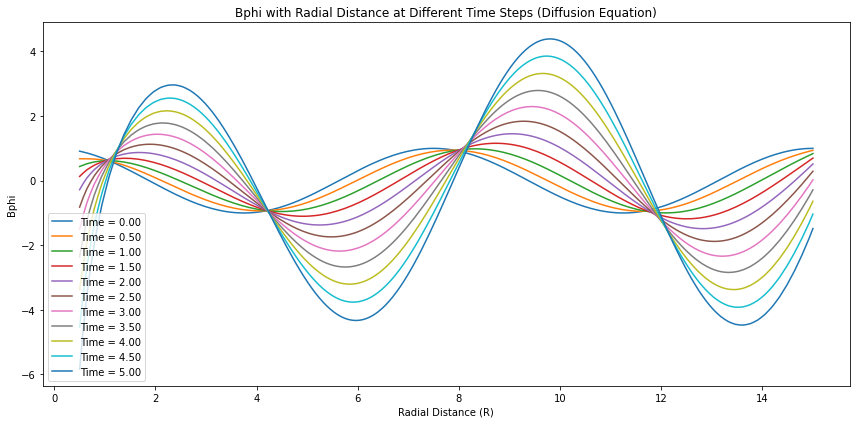

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
eta_t = 0.25 # Increased turbulent magnetic diffusivity
np.random.seed(42)
# Radial grid
R_max = 15 # Maximum radial distance(in kpc)
Nr = 200  # Increased number of grid points in radial direction
dr = R_max / Nr

# Time parameters
T = 5 # Increased total time
Nt = 500 # Increased number of time steps
dt = T / Nt
h=1
# Initialize magnetic field B (considering only the radial component) with a larger seed field
R = np.linspace(0.5, R_max, Nr)
Br = np.sin((4 * np.pi * R)/R_max)
Bphi = np.cos(4 * np.pi * R / R_max)
#Br = np.exp(-R/R_max)
#Br = np.random.rand(Nr)
# Function to compute the radial Laplacian of B
def compute_laplacian_Br(R,Br,Bphi):
    alpha = 0.5
    return eta_t*(np.gradient((1/R)*np.gradient(R*Br, dr), dr) + ((np.pi)**2)*Br/(4*h**2)) -(2*alpha*Bphi/np.pi)

def compute_laplacian_Bphi(R,Br,Bphi):
    omega0 = 0.5
    r_omega = 1
    omega = omega0/(1+(R/r_omega)**2)**0.5
    q = ((R/r_omega)**2) * (1+(R/r_omega)**2)**(-1)
    return eta_t*(np.gradient((1/R)*np.gradient(R*Bphi, dr), dr) + ((np.pi)**2)*Br/(4*h**2)) - (q*omega*Br)

# Runge-Kutta method for solving the diffusion equation
def runge_kutta_step(R,Br,Bphi, dt):
    k1_Br = dt * compute_laplacian_Br(R,Br,Bphi)
    k1_Bphi = dt * compute_laplacian_Bphi(R,Br,Bphi)

    k2_Br = dt * compute_laplacian_Br(R + 0.5*k1_Br,Br + 0.5 * k1_Br, Bphi + 0.5*k1_Br)
    k2_Bphi = dt * compute_laplacian_Bphi(R + 0.5*k1_Bphi,Br + 0.5 * k1_Bphi, Bphi + 0.5*k1_Bphi)

    k3_Br = dt * compute_laplacian_Br(R + 0.5*k2_Br,Br + 0.5 * k2_Br, Bphi + 0.5*k2_Br)
    k3_Bphi = dt * compute_laplacian_Bphi(R + 0.5*k2_Bphi,Br + 0.5 * k2_Bphi, Bphi + 0.5*k2_Bphi)

    k4_Br = dt * compute_laplacian_Br(R + k3_Br,Br + k3_Br, Bphi + k3_Br)
    k4_Bphi = dt * compute_laplacian_Bphi(R + k3_Bphi,Br + k3_Bphi, Bphi + k3_Bphi)

    new_Br = Br + (k1_Br + 2 * k2_Br + 2 * k3_Br + k4_Br) / 6
    new_Bphi = Bphi + (k1_Bphi + 2 * k2_Bphi + 2 * k3_Bphi + k4_Bphi) / 6

    return new_Br, new_Bphi

# Store the evolution of magnetic field at different radial positions
evolution_Br = np.zeros((Nt + 1, Nr))
evolution_Bphi = np.zeros((Nt + 1, Nr))

# Time-stepping scheme using Runge-Kutta
for t in range(Nt + 1):
    evolution_Br[t, :] = np.copy(Br)
    evolution_Bphi[t, :] = np.copy(Bphi)
    Br, Bphi = runge_kutta_step(R,Br, Bphi, dt)

# Plot the magnetic field components Br and Bphi with time at different radial positions
# Plot Br with respect to radial distance R at different time steps
plt.figure(figsize=(12, 6))
for t in range(0, Nt + 1, Nt // 10):  # Plot every 10th time step
    plt.plot(R, evolution_Br[t, :], label=f'Time = {t * dt:.2f}')
plt.xlabel('Radial Distance (R)')
plt.ylabel('Br')
plt.title('Br with Radial Distance at Different Time Steps (Diffusion Equation)')
plt.legend()
plt.tight_layout()
plt.show()

# Plot Bphi with respect to radial distance R at different time steps
plt.figure(figsize=(12, 6))
for t in range(0, Nt + 1, Nt // 10):  # Plot every 10th time step
    plt.plot(R, evolution_Bphi[t, :], label=f'Time = {t * dt:.2f}')
plt.xlabel('Radial Distance (R)')
plt.ylabel('Bphi')
plt.title('Bphi with Radial Distance at Different Time Steps (Diffusion Equation)')
plt.legend()
plt.tight_layout()
plt.show()

